# AIM :- 

### To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of lymph nodes

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:\\dataset\\datasets_474_966_haberman.csv",names=['Age','Op_year','axil_nodes','Surv_status'])
df

,Age,Op_year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [3]:
df.describe()

,Age,Op_year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
df.isnull().sum()  # check for missing values.

Age            0
Op_year        0
axil_nodes     0
Surv_status    0
dtype: int64

# Age Variable

## Histogram

In [5]:
import seaborn as sns
sns.distplot(df['Age'],bins=10,kde=False)

# Statistics 

min Age = 30

max Age = 83

Mean = 52.457516

Standard deviation = 10.803452

In [6]:
pd.value_counts(df['Age']) 

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: Age, dtype: int64

##### we have more patients with Age in range (45 to 65) 

# Op_year variable

## Histogram

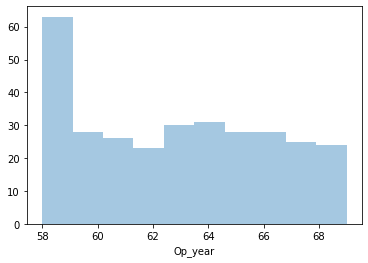

In [7]:
sns.distplot(df['Op_year'],bins=10,kde=False)

In [8]:
pd.value_counts(df['Op_year']) 

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: Op_year, dtype: int64

#### we have most operations held in 1958 i.e 36 operations 

# Statistics 

min  = 58

max  = 69

Mean = 62.852941

Standard deviation = 3.249405

# axiel_nodes variable

## Histogram

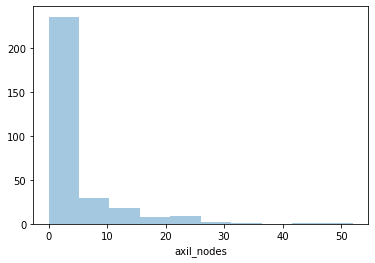

In [9]:
sns.distplot(df['axil_nodes'],bins=10,kde=False)

In [10]:
# we observed that most of the patients have 0 auxillary nodes 
pd.value_counts(df['axil_nodes']==0)

False    170
True     136
Name: axil_nodes, dtype: int64

#### we have 136 patients who have 0 axil_nodes out of 306 which is very high (approx = 45%)

# Statistics 

min  = 0

max  = 52

Mean = 4.026144

Standard deviation = 7.189654 	

# Surv_status

In [11]:
pd.value_counts(df['Surv_status'])

1    225
2     81
Name: Surv_status, dtype: int64

#### clearly we can see that after operation 255 patients survived 5 years or longer which is almost 74%

#### And 81 patients died within 5 year after operation.

#### Our Target variable is unbalenced.

# box plots

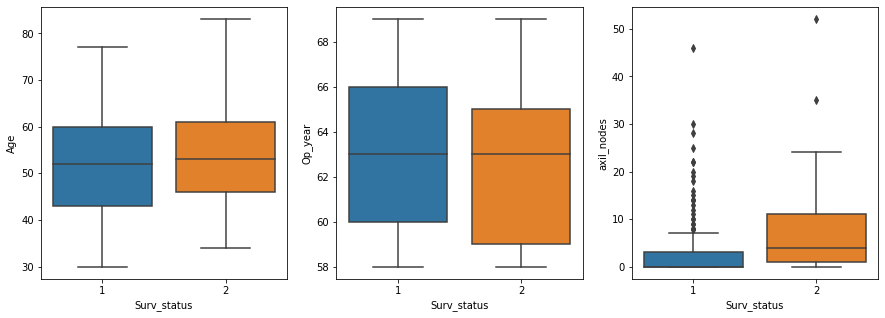

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='Surv_status', y=feature, data=df,ax=axes[i])

## Violin Plots

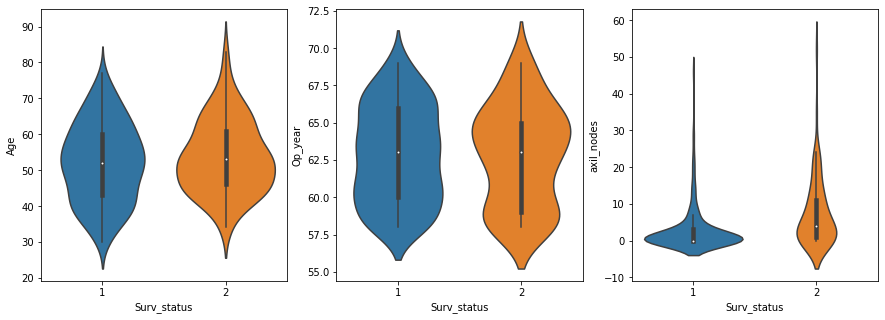

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(list(df.columns)[:-1]):
    sns.violinplot( x='Surv_status', y=feature, data=df, ax=axes[i])

#### we can see that the patients treated after 1966 have the slighlty higher chance to surive that the rest.

## Pairplots

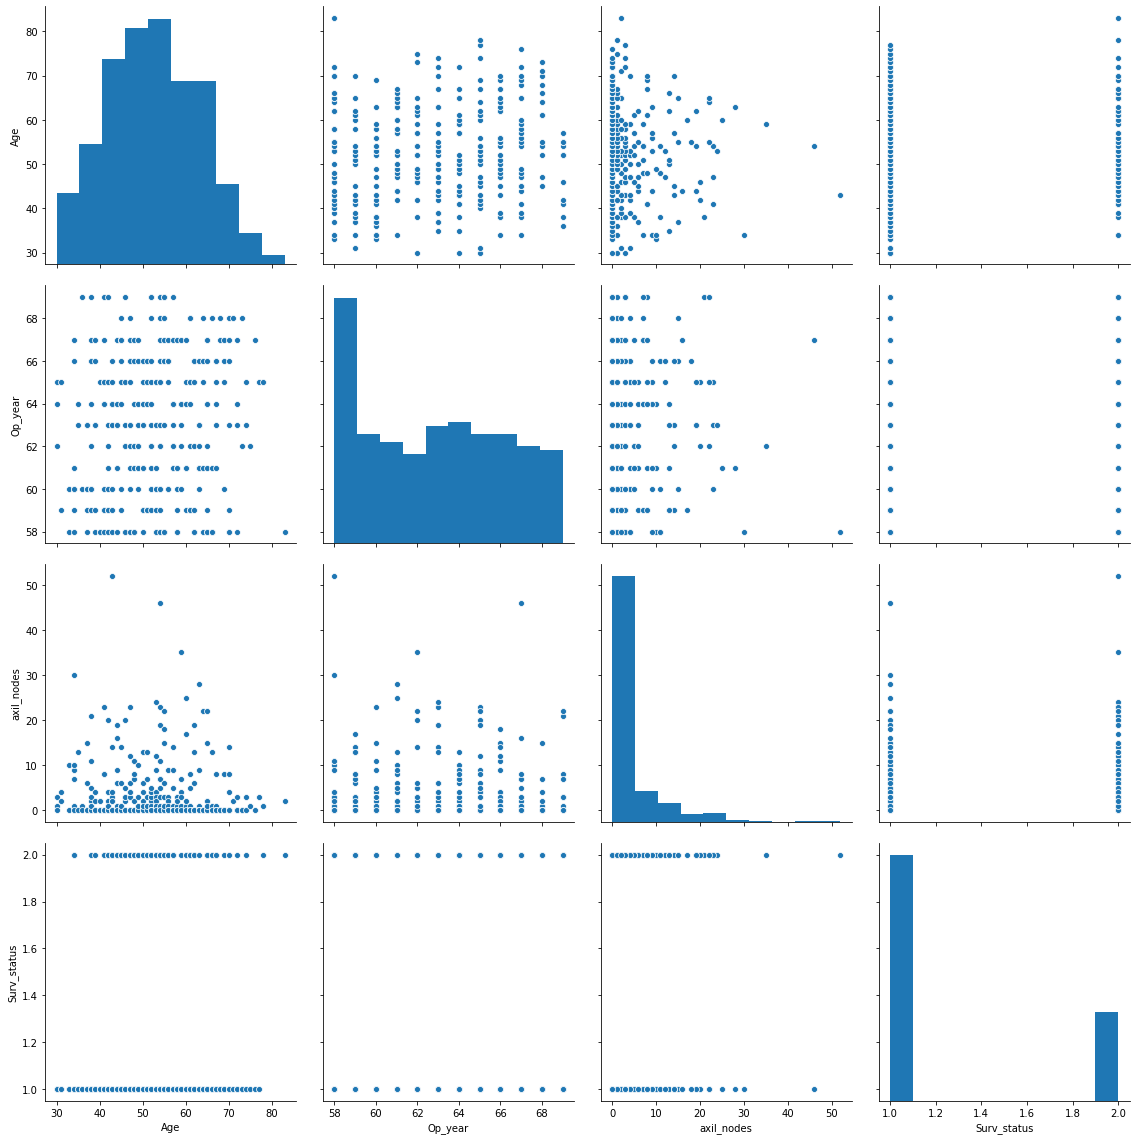

In [14]:
sns.pairplot(df,height=4)

# Correlations

In [15]:
pearson=df.corr(method='pearson', min_periods=1)
pearson

,Age,Op_year,axil_nodes,Surv_status
Age,1.000000,0.089529,-0.063176,0.067950
Op_year,0.089529,1.000000,-0.003764,-0.004768
axil_nodes,-0.063176,-0.003764,1.000000,0.286768
Surv_status,0.067950,-0.004768,0.286768,1.000000


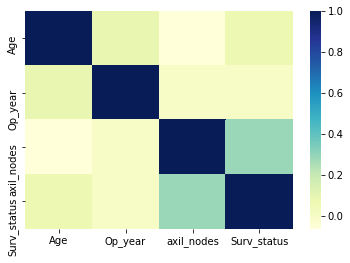

In [16]:
sns.heatmap(pearson,cmap="YlGnBu")

In [17]:
kendall=df.corr(method='kendall')
kendall

,Age,Op_year,axil_nodes,Surv_status
Age,1.000000,0.063274,-0.070443,0.046274
Op_year,0.063274,1.000000,-0.027588,-0.006421
axil_nodes,-0.070443,-0.027588,1.000000,0.290081
Surv_status,0.046274,-0.006421,0.290081,1.000000


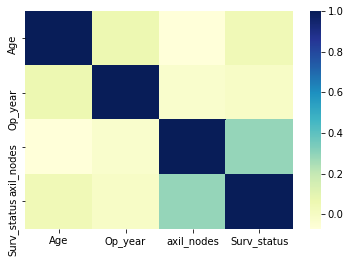

In [18]:
sns.heatmap(kendall,cmap="YlGnBu")

In [19]:
spearman=df.corr(method='spearman')
spearman

,Age,Op_year,axil_nodes,Surv_status
Age,1.000000,0.091069,-0.097691,0.055914
Op_year,0.091069,1.000000,-0.036146,-0.007536
axil_nodes,-0.097691,-0.036146,1.000000,0.327081
Surv_status,0.055914,-0.007536,0.327081,1.000000


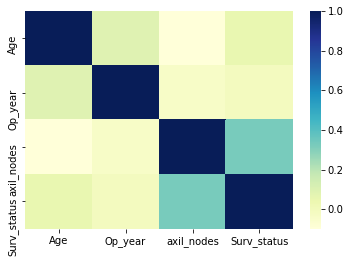

In [20]:
sns.heatmap(spearman,cmap="YlGnBu")

In [21]:
df.groupby(df.columns.tolist(),as_index=False).size()

Age  Op_year  axil_nodes  Surv_status
30   62       3           1              1
     64       1           1              1
     65       0           1              1
31   59       2           1              1
     65       4           1              1
                                        ..
75   62       1           1              1
76   67       0           1              1
77   65       3           1              1
78   65       1           2              1
83   58       2           2              1
Length: 289, dtype: int64

In [22]:
df.duplicated().sum()

17

#### we have 17 duplicate rows